In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sample():
    omega = 2*np.pi*(7+2) # R = 7 here
    theta = []
    n = []
    delt = 1/128
    i = 0
    while(i*delt < 1):
      theta.append((omega*i*delt)%(2*np.pi))
      n.append(i)
      i+=1
    theta = np.array(theta)
    n = np.array(n)
    return theta, n

In [5]:
def split():
    thetatest, ntest = sample()
    np.random.seed(7+2) # R = 7 here
    ntrain = np.sort(np.array(np.random.choice(127, 10, replace=False)))
    thetatrain = []
    for i in range(len(ntrain)):
        thetatrain.append(thetatest[ntrain[i]-i])
        ntest = np.delete(ntest,ntrain[i]-i)
        thetatest = np.delete(thetatest,ntrain[i]-i)
    thetatrain = np.array(thetatrain)
    return ntrain, thetatrain, ntest, thetatest

In [8]:
def lasso():
    ntrain,thetatrain,ntest,thetatest = split()
    M = 11
    i=0
    w = []
    l = [0]
    l = np.array(l)
    E = []
    X = []
    for j in range(M):
        X.append(np.power((ntrain)/128,j, dtype=float))
    X = np.array(X)
    X = X.transpose()
    while(True):
        w.append([])
        w[i] = np.random.randn(M)
        for j in range(10000):
            w[i] = w[i] + 0.05*((X.transpose()).dot((thetatrain.transpose()) - X.dot(w[i].transpose())) -l[i]*np.sign(w[i]))
        E.append(l[i]*np.sum(np.absolute(w[i])) + (((thetatrain.transpose()) - X.dot(w[i].transpose())).transpose()).dot((thetatrain.transpose()) - X.dot(w[i].transpose())))
        if(np.sum(w[i] < 10**(-5)) > 5):
            break
        i += 1
        l = np.append(l,[i*0.01])
        #print(l)
    
    w = np.array(w).transpose()
    E = np.array(E)
    plt.figure()
    plt.plot(l,E,'o-')
    plt.xlabel("lambda")
    plt.ylabel("Ed")
    plt.title("Reconstruction Error v/s lambda")
    plt.show()
    for i in range(M):
        plt.figure()
        plt.plot(l,w[i],'o-')
        plt.xlabel("lambda")
        plt.ylabel("w"+str(i))
        plt.title("w"+str(i)+" v/s lambda")
        plt.savefig("w"+str(i)+".png")
        plt.show()

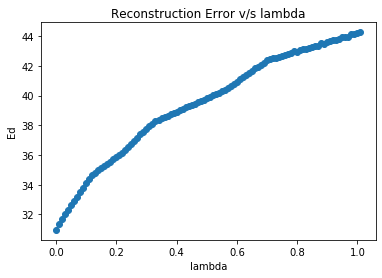

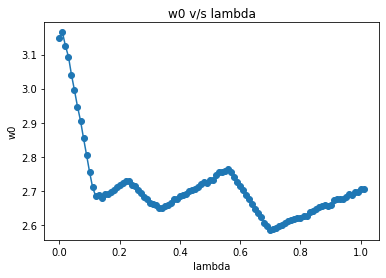

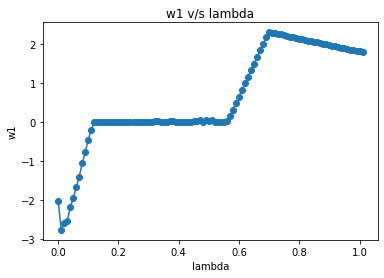

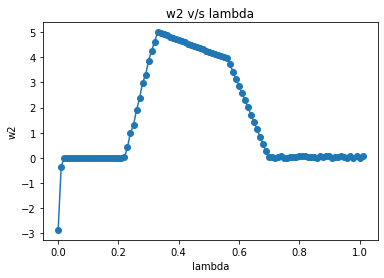

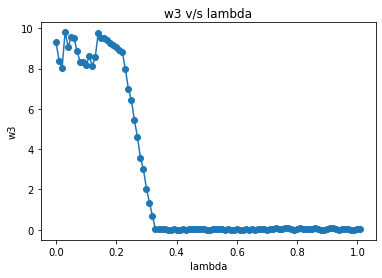

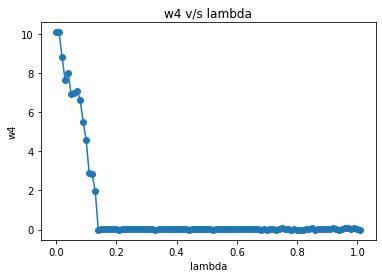

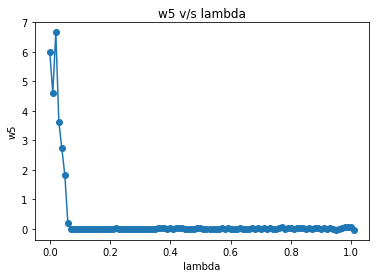

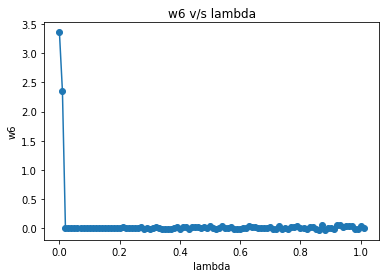

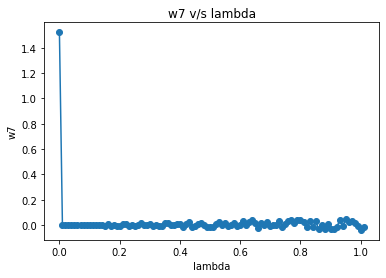

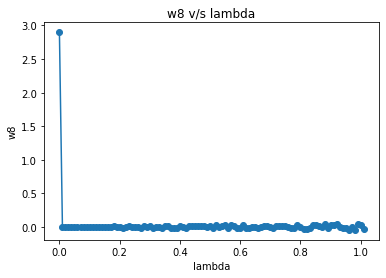

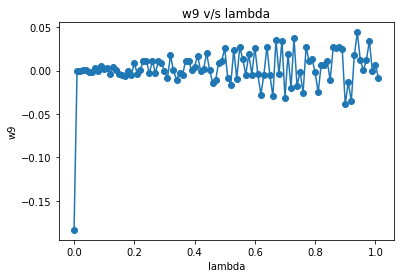

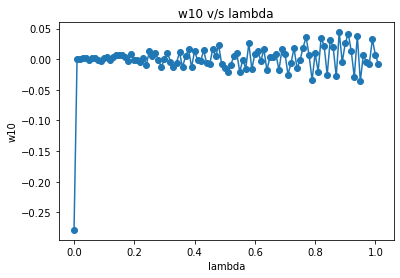

In [9]:
lasso()